# Watson API test

This notebook is going to be important for the **data labeling**. 

Since the data part of my project is going to be a very important one, I gonna create a section where I will talk about the labeling problem in natural language processing. There are different ways to deal with the labeling problem: 

- Labeling via expert
- week supervised learning
- Using Watson API

I thought it´s going to be interesting to use the Watson API to classify emotions. 
Important, especially for the discussion, is to figure out how the Waston systems work. Therefore I should explain in the report:

- Model - The model they are using

Also important:

- example - how good the model works

**In this notebook, I´m going to run the API, see how the API works, how the output is going to be and how good the API performers.**

# API

I´m going to use the [Watson API from IBM](https://natural-language-understanding-demo.ng.bluemix.net/).



## Data

For this notebook I´m going to use the **data "*trumptweets2.csv*"**, which I scraped myself via the **GitHub code**. 

In [11]:
import pandas as pd
from IPython.display import Image

In [51]:
# load the tweets
data = pd.read_csv("trumptweets.csv", sep=';')

In [52]:
data.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,realDonaldTrump,09.02.20 00:47,13459,72445,A great coach and a fantastic guy. His endorse...,NaN,NaN,NaN,"1,22629E+18",https://twitter.com/realDonaldTrump/status/122...
1,realDonaldTrump,08.02.20 22:08,47880,215503,Pete Rose played Major League Baseball for 24 ...,NaN,NaN,NaN,"1,22625E+18",https://twitter.com/realDonaldTrump/status/122...
2,realDonaldTrump,08.02.20 20:48,9452,37402,Total and complete Endorsement for Debbie Lesk...,NaN,#NAME?,NaN,"1,22623E+18",https://twitter.com/realDonaldTrump/status/122...
3,realDonaldTrump,08.02.20 20:40,17545,62484,Governor Cuomo wanted to see me this weekend. ...,NaN,NaN,NaN,"1,22623E+18",https://twitter.com/realDonaldTrump/status/122...
4,realDonaldTrump,08.02.20 20:01,27437,120598,We will not be touching your Social Security o...,NaN,NaN,NaN,"1,22622E+18",https://twitter.com/realDonaldTrump/status/122...


At this point, it´s going to be important the show the IBM Watson Model does work well. Therefore I will look manually through his tweets and take, in my opinion, sentences that are difficult and interesting to classify for a specific emotion. 


In [10]:
for i in range(100):
    print("------")
    print(i, data.text[i])

------
0 A great coach and a fantastic guy. His endorsement of me in Indiana was a very big deal! https:// twitter.com/kyle__boone/st atus/1226234981808250880 …
------
1 Pete Rose played Major League Baseball for 24 seasons, from 1963-1986, and had more hits, 4,256, than any other player (by a wide margin). He gambled, but only on his own team winning, and paid a decades long price. GET PETE ROSE INTO THE BASEBALL HALL OF FAME. It’s Time!
------
2 Total and complete Endorsement for Debbie Lesko! @RepDLesko Love Arizona. https:// twitter.com/repdlesko/stat us/1225484090754899969 …
------
3 Governor Cuomo wanted to see me this weekend. He just canceled. Very hard to work with New York - So stupid. All they do is sue me all the time! https:// twitter.com/RepStefanik/st atus/1225494053913079808 …
------
4 We will not be touching your Social Security or Medicare in Fiscal 2021 Budget. Only the Democrats will destroy them by destroying our Country’s greatest ever Economy!
------
5 ...the wor

Sentence 1:

**8 Crazy Nancy Pelosi’s Impeachment Hoax has lifted Republican Congressional Polls (she lost the House once before!), and my Polls, WAY UP, which was expected, but it has had a great effect on Republican Senate races, including North Carolina, Kentucky, Colorado and Arizona. Thanks!**

German translation:

Der Amtsenthebungs-Schwindel der verrückten Nancy Pelosi hat die republikanischen Kongress-Umfragen aufgehoben (sie hat das Haus schon einmal verloren!), und meine Umfragen, WAY UP, was erwartet wurde, aber es hatte eine große Auswirkung auf die republikanischen Senatswahlen, einschließlich North Carolina, Kentucky, Colorado und Arizona. Danke!

I´m in the opinion at the end the message shows some thankfulness, there is a peas of discussing, but mainly happiness about the happy end.


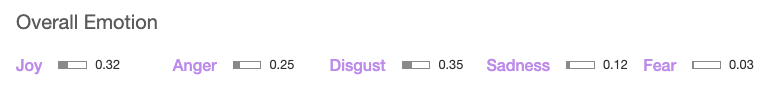

In [12]:
Image("sentence8.png")

Sentence 2:

**19 JOBS, JOBS, JOBS! #PromisesMadePromisesKept**

I think this one is very interesting one! 
Since I know the goal, labaling tweets to analyze a corrrelation to his mood and the economical performance. 
But in the perspective of natural language processing it´s interesting to see how the model sees this tweets.

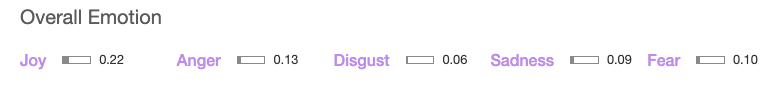

In [14]:
# with hashtag
Image("sentence19.png")

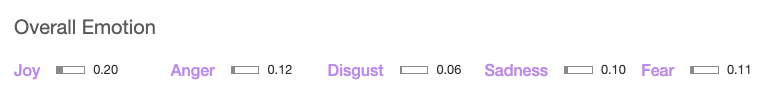

In [13]:
# without hashtag
Image("sentence19_withouthashtag.png")

Sentence 3: 

**87 Democrats = 17 Witnesses. Republicans = 0 Witnesses.**

Also really interesting one, because I know the tweets is from trump the his republican and I also know he is on the impeachment trial. 
Therefore I can say, with this tweet does he represent his unhappiness und unfeair treatment in the trail. Therefore I would say the tweets represents the emotion discussed or anger. 

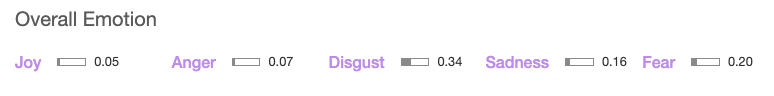

In [15]:
Image("sentence87.png")

Sentence 4:
    
**94 To keep America Safe, we have fully rebuilt the U.S. Military – it is now stronger, more powerful, and more lethal than ever before. Thanks to the courage of American Heroes, the ISIS Caliphate has been DESTROYED & its founder & leader – the animal known as al-Baghdadi – is DEAD!**

Very interesting, he is talking about dead. The USA killed al-Baghdadi and Trump seems to be very proud. 


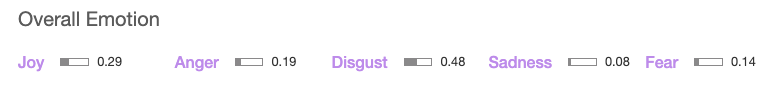

In [16]:
Image("sentence94.png")

### Hint
I just figured out a little more how the computation maid work. 

Mainly I checked the score of the full document, but it´s also possible to check the score of entities and keywords of the sentence. 

This gives more insight into the understanding of the full document score! 

Below is the picture of the entities and keyword scores. 

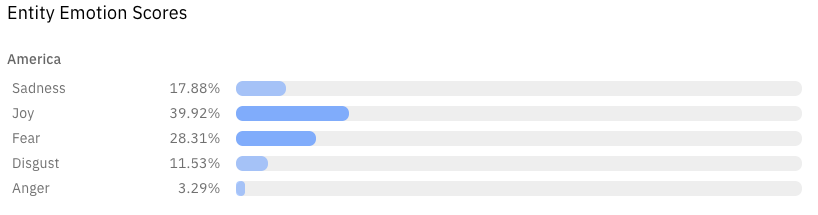

In [61]:
# list of the socre of all entity types of the sentence
Image("sentence94_entities1.png")
#Image("sentence94_entities2.png")

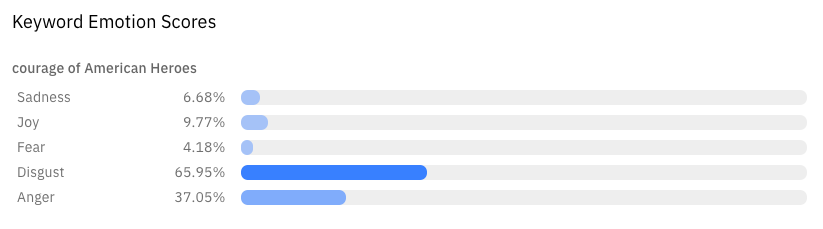

In [63]:
# list of the socre of all keyword types of the sentence
Image("sentence94_keywords1.png")
#Image("sentence94_keywords2.png")
#Image("sentence94_keywords3.png")
#Image("sentence94_keywords4.png")
#Image("sentence94_keywords5.png")

In [32]:
# look at the tweet sentence 94
data.loc[94,:]

username                                       realDonaldTrump
date                                            31.01.20 04:04
retweets                                                 14745
favorites                                                60654
text         To keep America Safe, we have fully rebuilt th...
geo                                                        NaN
mentions                                                   NaN
hashtags                                                   NaN
id                                                 1,22308E+18
permalink    https://twitter.com/realDonaldTrump/status/122...
Name: 94, dtype: object

At this point I know this announcement was a big thing in media, therefore I do expect matrixes like retweets and favorites to be very high compared to other "more usual" tweets.

- retweets 14745
- favorites 60654

In [40]:
# checking the max reweets and favorites
retweets_max = max(data.retweets)
favoriets_max = max(data.favorites)
print("Retweets max:", retweets_max)
print("Favorites max:", favoriets_max)

Retweets max: 308762
Favorites max: 854964


In [33]:
data.head()

,username,date,retweets,favorites,text,geo,mentions,hashtags,id,permalink
0,realDonaldTrump,09.02.20 00:47,13459,72445,A great coach and a fantastic guy. His endorse...,NaN,NaN,NaN,"1,22629E+18",https://twitter.com/realDonaldTrump/status/122...
1,realDonaldTrump,08.02.20 22:08,47880,215503,Pete Rose played Major League Baseball for 24 ...,NaN,NaN,NaN,"1,22625E+18",https://twitter.com/realDonaldTrump/status/122...
2,realDonaldTrump,08.02.20 20:48,9452,37402,Total and complete Endorsement for Debbie Lesk...,NaN,#NAME?,NaN,"1,22623E+18",https://twitter.com/realDonaldTrump/status/122...
3,realDonaldTrump,08.02.20 20:40,17545,62484,Governor Cuomo wanted to see me this weekend. ...,NaN,NaN,NaN,"1,22623E+18",https://twitter.com/realDonaldTrump/status/122...
4,realDonaldTrump,08.02.20 20:01,27437,120598,We will not be touching your Social Security o...,NaN,NaN,NaN,"1,22622E+18",https://twitter.com/realDonaldTrump/status/122...


In [37]:
# the second tweet has a lot of retweets , just want to check out what the tweet is
print(data.text[1])

Pete Rose played Major League Baseball for 24 seasons, from 1963-1986, and had more hits, 4,256, than any other player (by a wide margin). He gambled, but only on his own team winning, and paid a decades long price. GET PETE ROSE INTO THE BASEBALL HALL OF FAME. It’s Time!


## Review

In general, does the API do a good job! 
The cases tested I presented here where in some sense tricky, I tested several ones, which I don´t mention here. The other tested worked very well. 

**Therefore I can take to API to label the data.**

# API - Test

In this section, I´m going to test several things:

- Run API
- handle input data
- handle the input parameters
- handle output data

Therefore I **orient myself on the given code** on the [Natural Language Understanding webpage](https://cloud.ibm.com/apidocs/natural-language-understanding/natural-language-understanding?code=python#emotion).

In [86]:
# libraries I need to import
import json

# if import does not work
# pip install --upgrade "ibm-watson>=4.2.1"
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, EntitiesOptions, KeywordsOptions, EmotionOptions

In [66]:
# I saved all my important data into a json file
# this file I open here to save the apikey and url in a variable
# since other people should not see my keys
with open('watson_api.json') as json_file:
    # save data in dict
    api_access = json.load(json_file)

# init variables neeeded 
apikey = api_access["apikey"]
url = api_access["url"]

In [67]:
# this is going to be a test run
# init tweet text
# take one of the sentence I check in the data part of this notebook
# test sentence 2
tweet_text = "JOBS, JOBS, JOBS! #PromisesMadePromisesKept"

### Test 1

Here I´m going to test the example of the [Natural Language Understanding webpage.](https://cloud.ibm.com/apidocs/natural-language-understanding/natural-language-understanding?code=python#analyze-text)

- **Code example**: Methods - Analyze text

In [ ]:
# settings for the api 
authenticator = IAMAuthenticator(apikey)
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2019-07-12',
    authenticator=authenticator)

natural_language_understanding.set_service_url(url)

In [81]:
# example request
response = natural_language_understanding.analyze(
    text='IBM is an American multinational technology company '
    'headquartered in Armonk, New York, United States, '
    'with operations in over 170 countries.',
    features=Features(
        entities=EntitiesOptions(emotion=True, sentiment=True, limit=2),
        keywords=KeywordsOptions(emotion=True, sentiment=True,
                                 limit=2))).get_result()

print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 1,
    "text_characters": 140,
    "features": 2
  },
  "language": "en",
  "keywords": [
    {
      "text": "American multinational technology company",
      "sentiment": {
        "score": 0,
        "label": "neutral"
      },
      "relevance": 0.984693,
      "emotion": {
        "sadness": 0.082208,
        "joy": 0.074673,
        "fear": 0.050149,
        "disgust": 0.035402,
        "anger": 0.024366
      },
      "count": 1
    },
    {
      "text": "United States",
      "sentiment": {
        "score": 0,
        "label": "neutral"
      },
      "relevance": 0.854311,
      "emotion": {
        "sadness": 0.082208,
        "joy": 0.074673,
        "fear": 0.050149,
        "disgust": 0.035402,
        "anger": 0.024366
      },
      "count": 1
    }
  ],
  "entities": [
    {
      "type": "Company",
      "text": "IBM",
      "sentiment": {
        "score": 0,
        "label": "neutral"
      },
      "relevance": 0.95577,
      "emoti

### Test 2

**Test twitter text test**

Define how the output should look like:

- emotions full document
- emotions entities of the sentence
- emotions keywords of the sentence

Fore the **project** I´m going to use **just** the **full document score**, but the other data could be interesting for publishing a dataset. 

In [87]:
# test 2 request
response = natural_language_understanding.analyze(
    text= tweet_text,
    features=Features(
        emotion=EmotionOptions(document=True),
        entities=EntitiesOptions(emotion=True, sentiment=True, limit=2),
        keywords=KeywordsOptions(emotion=True, sentiment=True,
                                 limit=2)),
    return_analyzed_text = True
).get_result()

print(json.dumps(response, indent=2))

{
  "usage": {
    "text_units": 1,
    "text_characters": 43,
    "features": 3
  },
  "language": "en",
  "keywords": [
    {
      "text": "JOBS",
      "sentiment": {
        "score": -0.681388,
        "label": "negative"
      },
      "relevance": 0.994608,
      "emotion": {
        "sadness": 0.104125,
        "joy": 0.19712,
        "fear": 0.106967,
        "disgust": 0.062642,
        "anger": 0.122966
      },
      "count": 3
    },
    {
      "text": "PromisesMadePromisesKept",
      "sentiment": {
        "score": 0,
        "label": "neutral"
      },
      "relevance": 0.0982,
      "emotion": {
        "sadness": 0,
        "joy": 0,
        "fear": 0,
        "disgust": 0,
        "anger": 0
      },
      "count": 1
    }
  ],
  "entities": [
    {
      "type": "Person",
      "text": "JOBS",
      "sentiment": {
        "score": -0.681388,
        "label": "negative"
      },
      "relevance": 0.978348,
      "emotion": {
        "sadness": 0.104125,
        "j

In [71]:
print(tweet_text)

JOBS, JOBS, JOBS! #PromisesMadePromisesKept


In [85]:
#print(json.dumps(response, indent=2))
response

{'usage': {'text_units': 1, 'text_characters': 43, 'features': 2},
 'language': 'en',
 'keywords': [{'text': 'JOBS',
   'sentiment': {'score': -0.681388, 'label': 'negative'},
   'relevance': 0.994608,
   'emotion': {'sadness': 0.104125,
    'joy': 0.19712,
    'fear': 0.106967,
    'disgust': 0.062642,
    'anger': 0.122966},
   'count': 3},
  {'text': 'PromisesMadePromisesKept',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.0982,
   'emotion': {'sadness': 0, 'joy': 0, 'fear': 0, 'disgust': 0, 'anger': 0},
   'count': 1}],
 'entities': [{'type': 'Person',
   'text': 'JOBS',
   'sentiment': {'score': -0.681388, 'label': 'negative'},
   'relevance': 0.978348,
   'emotion': {'sadness': 0.104125,
    'joy': 0.19712,
    'fear': 0.106967,
    'disgust': 0.062642,
    'anger': 0.122966},
   'count': 2,
   'confidence': 0.943154},
  {'type': 'Hashtag',
   'text': '#PromisesMadePromisesKept',
   'sentiment': {'score': 0, 'label': 'neutral'},
   'relevance': 0.631927,
   

### IDEA:
Maybe I could use as input the text of Trumps tweets on a whole day. 
And analyze the full document mood of the day... 

In [88]:
print("something")

something
